In [1]:
#Import relevant libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Id,Country_Region,Province_State,Date,ConfirmedCases,Fatalities
0,1,Afghanistan,NaN,2020-01-22,0.0,0.0
1,2,Afghanistan,NaN,2020-01-23,0.0,0.0
2,3,Afghanistan,NaN,2020-01-24,0.0,0.0
3,4,Afghanistan,NaN,2020-01-25,0.0,0.0
4,5,Afghanistan,NaN,2020-01-26,0.0,0.0


In [3]:
train.shape

(24414, 6)

In [4]:
train.count()

Id                24414
Country_Region    24414
Province_State    10374
Date              24414
ConfirmedCases    24414
Fatalities        24414
dtype: int64

In [5]:
train.isna().sum()

Id                    0
Country_Region        0
Province_State    14040
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

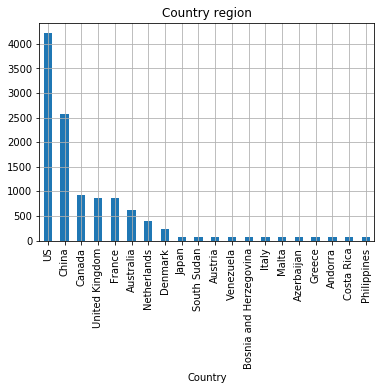

In [6]:
#Country_Region top 20
train['Country_Region'].value_counts()[0:20].plot(kind = 'bar', grid = True)
plt.title('Country region')
plt.xlabel('Country')
plt.show()

In [7]:
import datetime as datetime
train['Dates'] = pd.to_datetime(train.Date)
train['Year'] = train.Dates.dt.year
train['Month'] = train.Dates.dt.month
train['Week'] = train.Dates.dt.week
train['Name of month'] = train.Dates.dt.month_name()
train['Week_day_name'] = train.Dates.dt.weekday_name
train['Day_of_year'] = train.Dates.dt.dayofyear

In [8]:
train.shape

(24414, 13)

In [9]:
train.Fatalities.sum(), train.ConfirmedCases.sum()

(971145.0, 20391780.0)

In [10]:
#Grouping by province and country, the confirmed and fatality cases
train.groupby(['Province_State','Country_Region'])['ConfirmedCases','Fatalities'].sum().head(10)

,,ConfirmedCases,Fatalities
Province_State,Country_Region,,
Alabama,US,19530.0,418.0
Alaska,US,2124.0,52.0
Alberta,Canada,14606.0,172.0
Anguilla,United Kingdom,31.0,0.0
Anhui,China,63487.0,347.0
Arizona,US,25282.0,549.0
Arkansas,US,10133.0,151.0
Aruba,Netherlands,865.0,0.0
Australian Capital Territory,Australia,1321.0,15.0


In [11]:
#Countries with provinces/states
train.loc[train.Province_State.isna()==False, 'Country_Region'].unique()

array(['Australia', 'Canada', 'China', 'Denmark', 'France', 'Netherlands',
       'US', 'United Kingdom'], dtype=object)

In [12]:
#Provinces present in the data
train.Province_State.value_counts().head()

Kansas        78
Utah          78
Zhejiang      78
Michigan      78
New Jersey    78
Name: Province_State, dtype: int64

In [13]:
#Top 10 countries with the highest confirmed cases
train.groupby(['Country_Region'])['ConfirmedCases'].sum().nlargest(10)

Country_Region
China             4847436.0
US                3651436.0
Italy             2217867.0
Spain             1762730.0
Germany           1363131.0
France            1101300.0
Iran               980452.0
United Kingdom     529083.0
Korea, South       338399.0
Switzerland        320133.0
Name: ConfirmedCases, dtype: float64

In [14]:
#Top 10 countries with the highest fatalities
train.groupby(['Country_Region'])['Fatalities'].sum().nlargest(10)

Country_Region
Italy             240848.0
China             172428.0
Spain             152278.0
US                 92033.0
France             83133.0
Iran               62520.0
United Kingdom     45946.0
Netherlands        19507.0
Germany            16381.0
Belgium            14764.0
Name: Fatalities, dtype: float64

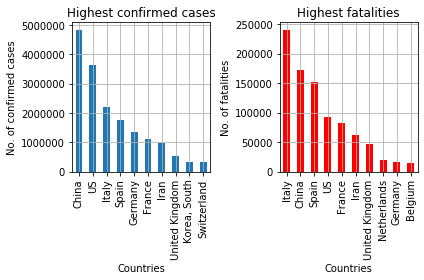

In [15]:
#Bar chart showing top 10 countries with the highest confirmed cases and fatalities
plt.subplot(1,2,1)
train.groupby(['Country_Region'])['ConfirmedCases'].sum().nlargest(10).plot(kind = 'bar',grid = True)
plt.title('Highest confirmed cases')
plt.xlabel('Countries')
plt.ylabel('No. of confirmed cases')
plt.subplot(1,2,2)
train.groupby(['Country_Region'])['Fatalities'].sum().nlargest(10).plot(kind = 'bar', grid=True,
                                                                    color='red')
plt.title('Highest fatalities')
plt.xlabel('Countries')
plt.ylabel('No. of fatalities')
plt.tight_layout()
plt.show()

In [16]:
#Top 10 provinces and country_region with the highest confirmed cases
train.groupby(['Province_State','Country_Region'])['ConfirmedCases'].sum().nlargest(10)

Province_State  Country_Region
Hubei           China             3979714.0
New York        US                1402650.0
New Jersey      US                 374624.0
California      US                 163544.0
Michigan        US                 158466.0
Massachusetts   US                 131451.0
Louisiana       US                 128258.0
Florida         US                 126900.0
Illinois        US                 117701.0
Pennsylvania    US                 112889.0
Name: ConfirmedCases, dtype: float64

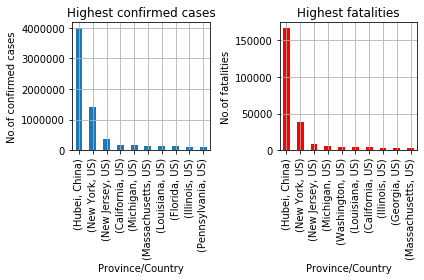

In [17]:
#Bar chart showing top 10 provinces and their countries with the highest confirmed cases and fatalities
plt.subplot(1,2,1)
train.groupby(['Province_State', 'Country_Region'])['ConfirmedCases'].sum().nlargest(10).plot(kind = 'bar',grid = True)
plt.title('Highest confirmed cases')
plt.xlabel('Province/Country')
plt.ylabel('No.of confirmed cases')
plt.subplot(1,2,2)
train.groupby(['Province_State', 'Country_Region'])['Fatalities'].sum().nlargest(10).plot(kind = 'bar',grid = True,
                                                                       color = 'red')
plt.title('Highest fatalities')
plt.xlabel('Province/Country')
plt.ylabel('No.of fatalities')
plt.tight_layout()
plt.show()

In [18]:
#Top 10 confirmed cases with their month, country and province
train.groupby(['Province_State','Country_Region','Name of month'])['ConfirmedCases'].sum().nlargest(10)

Province_State  Country_Region  Name of month
Hubei           China           March            2098222.0
                                February         1316575.0
New York        US              April             939185.0
Hubei           China           April             542421.0
New York        US              March             463465.0
New Jersey      US              April             282312.0
Michigan        US              April             119330.0
California      US              April             112314.0
Louisiana       US              April              99567.0
Massachusetts   US              April              97171.0
Name: ConfirmedCases, dtype: float64

In [19]:
#Top 10 fatalities with their month, country and province
train.groupby(['Province_State','Country_Region','Name of month'])['Fatalities'].sum().nlargest(10)

Province_State  Country_Region  Name of month
Hubei           China           March            94842.0
                                February         44620.0
New York        US              April            31428.0
Hubei           China           April            25649.0
New Jersey      US              April             7040.0
New York        US              March             6323.0
Michigan        US              April             4919.0
Louisiana       US              April             3585.0
Washington      US              April             2654.0
California      US              April             2646.0
Name: Fatalities, dtype: float64

In [20]:
#Top 10 confirmed cases with their month, week, country and province
train.groupby(['Province_State','Country_Region','Name of month','Week'])['ConfirmedCases'].sum().nlargest(10)

Province_State  Country_Region  Name of month  Week
New York        US              April          14      516434.0
Hubei           China           March          13      474606.0
                                               12      474597.0
                                               11      474427.0
                                               10      472083.0
                                February       8       436974.0
New York        US              April          15      422751.0
Hubei           China           February       9       392107.0
                                April          14      339012.0
                                February       7       315503.0
Name: ConfirmedCases, dtype: float64

In [21]:
#Top 10 fatalities by their month, week, country and province
train.groupby(['Province_State','Country_Region','Name of month','Week'])['Fatalities'].sum().nlargest(10)

Province_State  Country_Region  Name of month  Week
Hubei           China           March          13      22178.0
                                               12      21887.0
                                               11      21356.0
                                               10      20287.0
New York        US              April          15      16455.0
Hubei           China           April          14      16012.0
                                February       9       15723.0
New York        US              April          14      14973.0
Hubei           China           February       8       14719.0
                                April          15       9637.0
Name: Fatalities, dtype: float64

In [22]:
#Top 10 confirmed cases by their day of year, country and province
train.groupby(['Province_State','Country_Region','Day_of_year'])['ConfirmedCases'].sum().nlargest(10)

Province_State  Country_Region  Day_of_year
New York        US              99             151061.0
                                98             139875.0
                                97             131815.0
                                96             123160.0
                                95             113833.0
                                94             102987.0
                                93              92506.0
                                92              83948.0
                                91              75833.0
Hubei           China           95              67803.0
Name: ConfirmedCases, dtype: float64

In [23]:
#Top 10 fatalities by their day of year, country and province
train.groupby(['Province_State','Country_Region','Day_of_year'])['Fatalities'].sum().nlargest(10)

Province_State  Country_Region  Day_of_year
New York        US              99             6268.0
                                98             5489.0
                                97             4698.0
                                96             4159.0
                                95             3565.0
Hubei           China           99             3213.0
                                97             3212.0
                                98             3212.0
                                96             3210.0
                                95             3207.0
Name: Fatalities, dtype: float64

In [24]:
hmap = train[['ConfirmedCases','Fatalities','Month','Week', 'Day_of_year']]
hmap.head()

,ConfirmedCases,Fatalities,Month,Week,Day_of_year
0,0.0,0.0,1,4,22
1,0.0,0.0,1,4,23
2,0.0,0.0,1,4,24
3,0.0,0.0,1,4,25
4,0.0,0.0,1,4,26


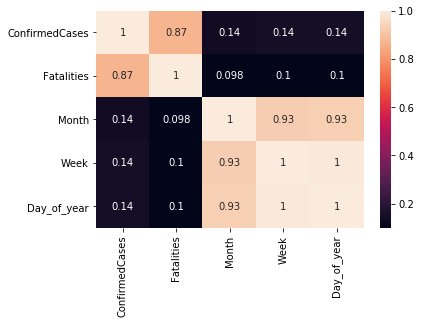

In [25]:
#Heatmap showing the correlation coefficients 
corr = hmap.corr()
sns.heatmap(corr, annot = True)
plt.show()